# Data preparation

### An example of sound data

In [7]:
import vocalpy as voc
import librosa

In [70]:
import vocalpy as voc
import matplotlib.pyplot as plt

VocalPy has built-in examples. If we just give it the name of an example, we get back a path to a file.

In [69]:
example = voc.example('samba.wav')
print(example)

/home/pimienta/Documents/repos/coding/vocalpy/vocalpy/src/vocalpy/examples/samba.wav


We load the sound with the `Sound.read` methodsound = voc.Sound.read(example)

In [71]:
sound = voc.Sound.read(example)

We now have a data container with the sound `data` itself as well as the `samplerate` as an attribute.

In [72]:
sound

vocalpy.Sound(data=array([[0.003... 0.        ]]), samplerate=44100, path=/home/pimienta/Documents/repos/coding/vocalpy/vocalpy/src/vocalpy/examples/samba.wav)

Let's visually inspect the sound.

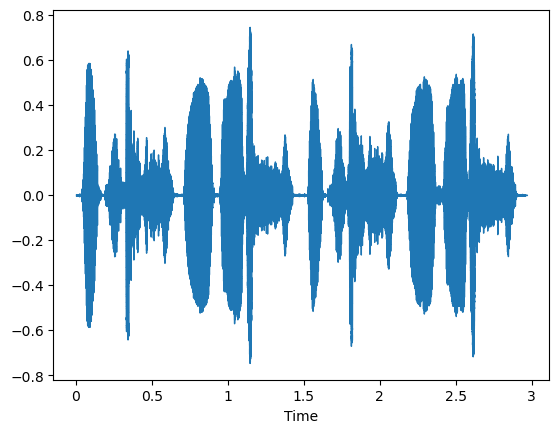

In [14]:
librosa.display.waveshow(sound.data)

We can see some peaks suggesting activity, but we can't tell much else about this sound just by looking at it as a time series.

## Enter: the spectrogram

* Intuitively: a picture of sound
* Technically speaking: "the squared magnitude of the Short Time Fourier Transform"

In [37]:
spect = voc.spectrogram(sound)

In [39]:
spect

vocalpy.Spectrogram(data=array([[[ -1....3.01612196]]]), frequencies=array([    0....7.5, 16000. ]), times=array([0.000e...   9.078e+00]), path=None, audio_path=PosixPath('/home/pimienta/.cache/vocalpy/bfsongrepo.tar.gz.untar/gy6or6_baseline_220312_0836.3.wav'))

In [41]:
spect.times

array([0.000e+00, 2.000e-03, 4.000e-03, ..., 9.074e+00, 9.076e+00,
       9.078e+00])

In [43]:
spect.frequencies[:10]

array([  0. ,  62.5, 125. , 187.5, 250. , 312.5, 375. , 437.5, 500. ,
       562.5])

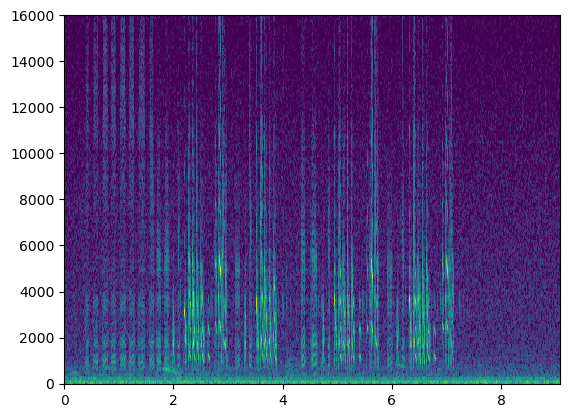

In [38]:
voc.plot.spectrogram(spect)

Writing down a workflow

In [62]:
bfsongrepo_dir = './data/Nicholson-Queen-Sober-2017-bfsongrepo-subset/'
wav_paths = voc.paths.from_dir(dir=bfsongrepo_dir, ext='wav')

Read in all the `Sound`s with a list comprehension

In [63]:
sounds = [
    voc.Sound.read(wav_path)
    for wav_path in wav_paths
]

To make sure our code is readable to "future us", we write down the parameters

In [65]:
params = dict(n_fft=512, hop_length=64)
callback = voc.spectrogram
spect_maker = voc.SpectrogramMaker(
    callback, params
)

In [67]:
spects = spect_maker.make(sounds, parallelize=True)

[########################################] | 100% Completed | 205.76 ms


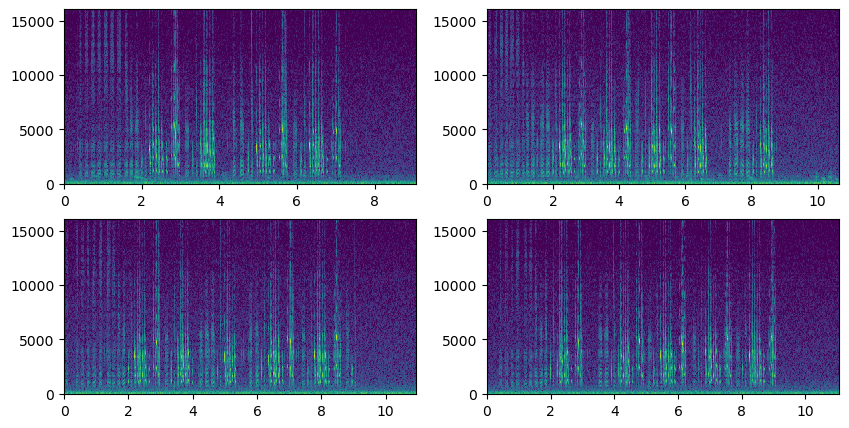

In [68]:
fig, ax_arr = plt.subplots(2, 2, figsize=(10, 5))
ax_arr = ax_arr.ravel()

for ax, spect in zip(ax_arr, spects):
    voc.plot.spectrogram(spect, ax=ax)

## Annotations

In [46]:
wav_paths = voc.paths.from_dir('data/Nicholson-Queen-Sober-2017-bfsongrepo-subset/', 'wav')

In [49]:
wav_paths[:5]

[PosixPath('data/Nicholson-Queen-Sober-2017-bfsongrepo-subset/gy6or6_baseline_220312_0836.3.wav'),
 PosixPath('data/Nicholson-Queen-Sober-2017-bfsongrepo-subset/gy6or6_baseline_220312_0837.4.wav'),
 PosixPath('data/Nicholson-Queen-Sober-2017-bfsongrepo-subset/gy6or6_baseline_220312_0837.6.wav'),
 PosixPath('data/Nicholson-Queen-Sober-2017-bfsongrepo-subset/gy6or6_baseline_220312_0838.8.wav'),
 PosixPath('data/Nicholson-Queen-Sober-2017-bfsongrepo-subset/gy6or6_baseline_220312_0839.9.wav')]

In [52]:
sound = voc.Sound.read(wav_paths[0])
spect = voc.spectrogram(sound)

In [50]:
annot_paths = voc.paths.from_dir('data/Nicholson-Queen-Sober-2017-bfsongrepo-subset/', 'csv')

In [51]:
annot_paths[:5]

[PosixPath('data/Nicholson-Queen-Sober-2017-bfsongrepo-subset/gy6or6_baseline_220312_0836.3.wav.csv'),
 PosixPath('data/Nicholson-Queen-Sober-2017-bfsongrepo-subset/gy6or6_baseline_220312_0837.4.wav.csv'),
 PosixPath('data/Nicholson-Queen-Sober-2017-bfsongrepo-subset/gy6or6_baseline_220312_0837.6.wav.csv'),
 PosixPath('data/Nicholson-Queen-Sober-2017-bfsongrepo-subset/gy6or6_baseline_220312_0838.8.wav.csv'),
 PosixPath('data/Nicholson-Queen-Sober-2017-bfsongrepo-subset/gy6or6_baseline_220312_0839.9.wav.csv')]

In [53]:
annot = voc.Annotation.read(annot_paths[0], format='simple-seq')

In [54]:
annot

Annotation(data=Annotation(annot_path=PosixPath('data/Nicholson-Queen-Sober-2017-bfsongrepo-subset/gy6or6_baseline_220312_0836.3.wav.csv'), notated_path=None, seq=<Sequence with 54 segments>), path=PosixPath('data/Nicholson-Queen-Sober-2017-bfsongrepo-subset/gy6or6_baseline_220312_0836.3.wav.csv'))

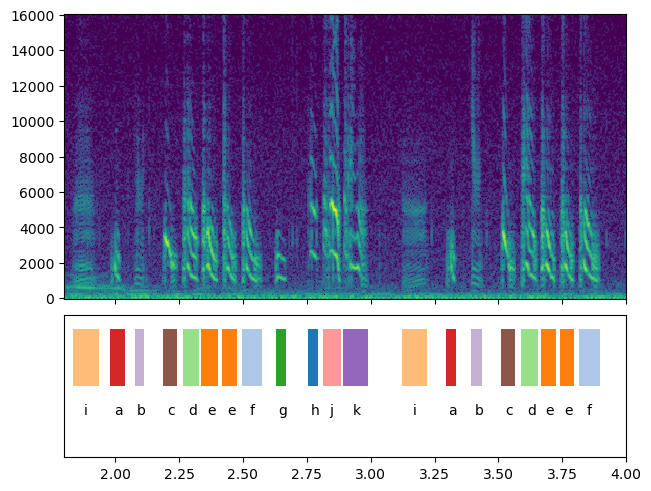

In [45]:
voc.plot.annotated_spectrogram(spect, annot, tlim=[1.8, 4]);